In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
   
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

   
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [25, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

In [ ]:
def forward_propagation_for_predict(X, parameters):
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           
    Z1 = tf.add(tf.matmul(W1, X), b1)                     
    A1 = tf.nn.relu(Z1)                                    
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     
    A2 = tf.nn.relu(Z2)                                   
    Z3 = tf.add(tf.matmul(W3, A2), b3)                    
    
    return Z3

In [ ]:
# Loading the dataset
#X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
#data = pd.read_csv('data.csv')
features = pd.read_csv('features_3_sec.csv')
#data = data.drop(['filename'],axis=1)
features = features.drop('filename',axis=1)
np.random.seed(10)
permut = list(np.random.permutation(9900))

genre_list = features.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
onehotencode = OneHotEncoder(sparse=False)
#print(len(yl))
y = y.reshape(len(y), 1)
y = onehotencode.fit_transform(y).T
print(y.shape)
scaler = StandardScaler()
X = scaler.fit_transform(np.array(features.iloc[:, :-1], dtype = float))
print(X.shape)
X = X[permut,:]
y = y[:,permut]
x_train, x_test, y_train, y_test = train_test_split(X, y.T, test_size=0.2,stratify = y.T
                                                   )

#print(data.iloc[:,:-1].shape)
#x_train = x_train.reshape((25,720))
print(x_train.shape)

x_train = x_train.T
print(x_train.shape)
y_train = y_train.T
print(y_train.shape)
x_test = x_test.T
y_test = y_test.T

features.head()

(10, 9990)
(9990, 58)
(7920, 58)
(58, 7920)
(10, 7920)


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
def create_placeholders(n_x, n_y):
    
    X = tf.placeholder(tf.float32,shape = (n_x,None))
    Y =  tf.placeholder(tf.float32,shape = (n_y,None))
   
    
    return X, Y

In [ ]:

def initialize_parameters():
    
    
    tf.set_random_seed(1)                  
        
    W1 = tf.get_variable("W1",[128,58],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[128,1],initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2",[64,128],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2",[64,1],initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3",[10,64],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3",[10,1],initializer = tf.zeros_initializer())
 
    print(W1)
   

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3
                }
    
    
    return parameters

In [ ]:
def forward_propagation(X, parameters):
    
    tf.set_random_seed(2)
    
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
   
    
    
    Z1 = tf.add(tf.matmul(W1, X), b1)                    
    A1 = tf.nn.relu(Z1) 
    A1 = tf.nn.dropout(A1,keep_prob = 0.9) 

    Z2 = tf.add(tf.matmul(W2, A1), b2)                     
    A2 = tf.nn.relu(Z2)  
    A2 = tf.nn.dropout(A2,keep_prob=0.9)
                    
    Z3 = tf.add(tf.matmul(W3, A2), b3)  
   
    
    return Z3

In [ ]:
def compute_cost(Z3, Y):
   
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits,labels =labels))
   
    return cost

In [ ]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.001,
          num_epochs = 250, minibatch_size = 64, print_cost = True):
   
    
    ops.reset_default_graph()                         
    tf.set_random_seed(1)                             
    seed = 3                                          
    (n_x, m) = X_train.shape                         
    n_y = Y_train.shape[0]                           
    costs = []                                       
    
    
    X, Y = create_placeholders(n_x,n_y)
    
    parameters = initialize_parameters()
    
    Z3= forward_propagation(X,parameters)
   
    cost = compute_cost(Z3,Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate,beta1=0.9,beta2 = 0.999,epsilon = 1e-08).minimize(cost)
   
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        
      sess.run(init)
        
        
      for epoch in range(num_epochs):

        epoch_cost = 0.                       
        num_minibatches = int(m / minibatch_size) 
        seed = seed + 1
        minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

        for minibatch in minibatches:

               
          (minibatch_X, minibatch_Y) = minibatch
                
               
          _ , minibatch_cost = sess.run([optimizer,cost],feed_dict = {X:minibatch_X,Y:minibatch_Y}
                                             )
               
                
          epoch_cost += minibatch_cost / minibatch_size

           
        if print_cost == True and epoch % 10 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
                
        if print_cost == True and epoch % 5 == 0:
            costs.append(epoch_cost)
                
        
      plt.plot(np.squeeze(costs))
      plt.ylabel('cost')
      plt.xlabel('iterations (per fives)')
      plt.title("Learning rate =" + str(learning_rate))
      plt.show()

        
      parameters = sess.run(parameters)
      print ("Parameters have been trained!")

        
      correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        
       
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

      print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
      print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
      return parameters

<tf.Variable 'W1:0' shape=(128, 58) dtype=float32_ref>
Cost after epoch 0: 2.997249
Cost after epoch 10: 0.924625
Cost after epoch 20: 0.603617
Cost after epoch 30: 0.445837
Cost after epoch 40: 0.350704
Cost after epoch 50: 0.279318
Cost after epoch 60: 0.239470
Cost after epoch 70: 0.198769
Cost after epoch 80: 0.183959
Cost after epoch 90: 0.183107
Cost after epoch 100: 0.161355
Cost after epoch 110: 0.139136
Cost after epoch 120: 0.144801
Cost after epoch 130: 0.135137
Cost after epoch 140: 0.117865
Cost after epoch 150: 0.117843
Cost after epoch 160: 0.107789
Cost after epoch 170: 0.112263
Cost after epoch 180: 0.104715
Cost after epoch 190: 0.098914
Cost after epoch 200: 0.095924
Cost after epoch 210: 0.091847
Cost after epoch 220: 0.081197
Cost after epoch 230: 0.093912
Cost after epoch 240: 0.092662


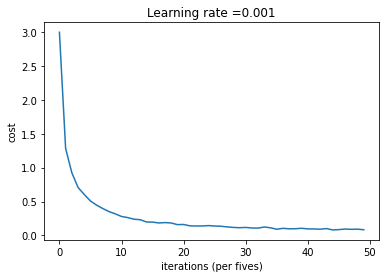

Parameters have been trained!
Train Accuracy: 0.98724747
Test Accuracy: 0.8848485


In [ ]:
parameters = model(x_train, y_train, x_test, y_test)